# Getting Started with ctapipe

This hands-on was presented at the Paris CTA Consoritum meeting (K. Kosack)

## Part 1: load and loop over data

In [1]:
from ctapipe.io import event_source
from ctapipe import utils
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = utils.get_dataset_path("gamma_test_large.simtel.gz")

In [3]:
for event in event_source(path, max_events=4):
    print(event.count, event.r0.event_id, event.mc.energy)

0 23703 0.5707105398178101 TeV
1 31007 1.8637498617172241 TeV
2 31010 1.8637498617172241 TeV
3 31012 1.8637498617172241 TeV


In [4]:
event

ctapipe.io.containers.DataContainer:
                    event_type: Event type
                       index.*: event indexing information
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                          mc.*: Monte-Carlo data
                    mcheader.*: Monte-Carlo run header data
                        trig.*: central trigger information
                         count: number of events processed
                        inst.*: instrumental information
                   pointing[*]: Telescope pointing positions
                 calibration.*: Container for calibration coefficients for the
                                current event

In [5]:
event.r0

ctapipe.io.containers.R0Container:
                        obs_id: observation ID
                      event_id: event id number
                tels_with_data: list of telescopes with data
                        tel[*]: map of tel_id to R0CameraContainer

In [6]:
for event in event_source(path, max_events=4):
    print(event.count, event.r0.tels_with_data)

0 {25, 21, 34, 13}
1 {34, 36, 7, 42, 13, 16, 19, 25, 28}
2 {58, 28, 46, 68}
3 {2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21}


In [7]:
event.r0.tel[2]

ctapipe.io.containers.R0CameraContainer:
                  trigger_time: Telescope trigger time, start of waveform
                                readout, None for MCs
                  trigger_type: camera's event trigger type if applicable
                  num_trig_pix: Number of trigger groups (sectors) listed
                   trig_pix_id: pixels involved in the camera trigger
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples)

In [8]:
r0tel = event.r0.tel[2]

In [9]:
r0tel.waveform

array([[[279, 276, 269, ..., 300, 359, 409],
        [281, 272, 291, ..., 278, 272, 277],
        [256, 251, 265, ..., 269, 266, 258],
        ...,
        [293, 297, 295, ..., 338, 305, 295],
        [359, 322, 296, ..., 275, 259, 296],
        [301, 342, 386, ..., 352, 335, 288]],

       [[300, 301, 301, ..., 295, 298, 304],
        [294, 295, 298, ..., 298, 299, 296],
        [299, 300, 299, ..., 299, 300, 301],
        ...,
        [301, 297, 299, ..., 303, 297, 299],
        [307, 304, 301, ..., 297, 300, 300],
        [302, 303, 307, ..., 303, 303, 299]]], dtype=uint16)

In [10]:
r0tel.waveform.shape

(2, 1855, 30)

note that this is ($N_{channels}$, $N_{pixels}$, $N_{samples}$)

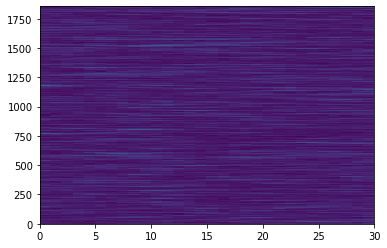

In [11]:
plt.pcolormesh(r0tel.waveform[0])

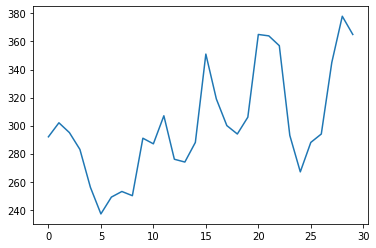

In [12]:
plt.plot(r0tel.waveform[0,10])

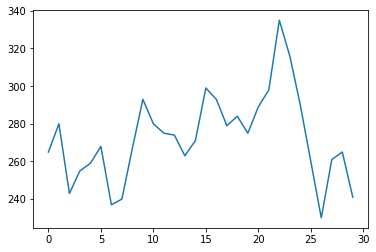

In [13]:
from ipywidgets import interact

@interact
def view_waveform(chan=0, pix_id=200):
    plt.plot(r0tel.waveform[chan, pix_id])

try making this compare 2 waveforms

## Part 2: Explore the instrument description
This is all well and good, but we don't really know what camera or telescope this is... how do we get instrumental description info?

Currently this is returned *inside* the event (it will soon change to be separate in next version or so)

In [14]:
subarray = event.inst.subarray  # soon EventSource will give you event, subarray separate

In [15]:
subarray

SubarrayDescription(name='MonteCarloArray', num_tels=98)

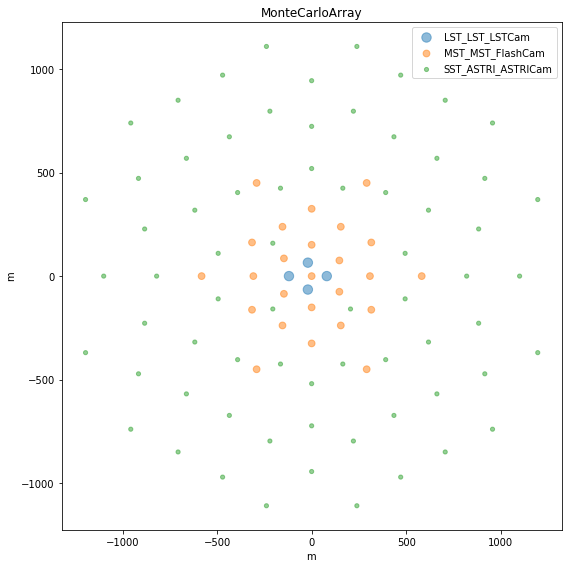

In [16]:
subarray.peek()

In [17]:
subarray.to_table()

tel_id,pos_x,pos_y,pos_z,name,type,num_mirrors,camera_type,tel_description
,m,m,m,,,,,
int16,float64,float64,float64,str5,str3,int64,str8,str18
1,-20.0,65.0,16.0,LST,LST,1,LSTCam,LST_LST_LSTCam
2,-20.0,-65.0,16.0,LST,LST,1,LSTCam,LST_LST_LSTCam
3,80.0,0.0,16.0,LST,LST,1,LSTCam,LST_LST_LSTCam
4,-120.0,0.0,16.0,LST,LST,1,LSTCam,LST_LST_LSTCam
5,0.0,0.0,10.0,MST,MST,1,FlashCam,MST_MST_FlashCam
6,0.0,151.1999969482422,10.0,MST,MST,1,FlashCam,MST_MST_FlashCam
7,0.0,-151.1999969482422,10.0,MST,MST,1,FlashCam,MST_MST_FlashCam
8,146.65599060058594,75.5999984741211,10.0,MST,MST,1,FlashCam,MST_MST_FlashCam


In [18]:
subarray.tel[2]

TelescopeDescription(type=LST, name=LST, optics=LST, camera=LSTCam)

In [19]:
subarray.tel[2].camera

CameraGeometry(cam_id='LSTCam', pix_type='hexagonal', npix=1855, cam_rot=0.0 rad, pix_rot=100.89299992867878 deg)

In [20]:
subarray.tel[2].optics

OpticsDescription(name=LST, equivalent_focal_length=28.00 m, num_mirros=1, mirror_area=386.73 m2)

In [21]:
tel = subarray.tel[2]

In [22]:
tel.camera

CameraGeometry(cam_id='LSTCam', pix_type='hexagonal', npix=1855, cam_rot=0.0 rad, pix_rot=100.89299992867878 deg)

In [23]:
tel.optics

OpticsDescription(name=LST, equivalent_focal_length=28.00 m, num_mirros=1, mirror_area=386.73 m2)

In [24]:
tel.camera.pix_x

<Quantity [ 0.        , -0.00944877, -0.0472442 , ..., -0.6519913 ,
           -0.6141959 , -0.62364468] m>

In [25]:
tel.camera.to_table()

pix_id,pix_x,pix_y,pix_area
,m,m,m2
int64,float64,float64,float64
0,0.0,0.0,0.002079326892271638
1,-0.00944877371419763,0.049099091130118636,0.002079326892271638
2,-0.04724419824666762,0.01636690782283136,0.002079326892271638
3,-0.037795424532469986,-0.03273218330728728,0.002079326892271638
4,0.00944877371419763,-0.049099091130118636,0.002079326892271638
5,0.04724419824666762,-0.01636690782283136,0.002079326892271638
6,0.037795424532469986,0.03273218330728728,0.002079326892271638
7,0.06614174532306863,-0.11456508825398498,0.002079326892271638


In [26]:
tel.optics.mirror_area

<Quantity 386.73324585 m2>

In [27]:
from ctapipe.visualization import CameraDisplay

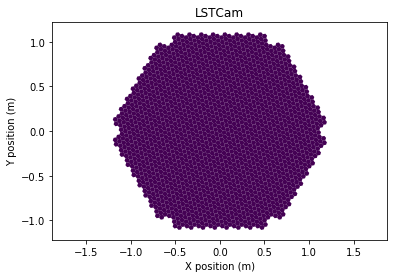

In [28]:
disp = CameraDisplay(tel.camera)

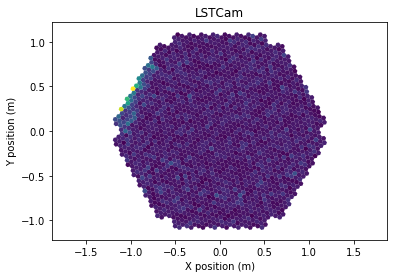

In [29]:
disp = CameraDisplay(tel.camera)
disp.image = r0tel.waveform[0,:,10]  # display channel 0, sample 0 (try others like 10)

 ** aside: ** show demo using a CameraDisplay in interactive mode in ipython rather than notebook

## Part 3: Apply some calibration and trace integration

In [30]:
from ctapipe.calib import CameraCalibrator

In [31]:
calib = CameraCalibrator(subarray=subarray)

In [32]:
for event in event_source(path, max_events=4):
    calib(event) # fills in r1, dl0, and dl1
    print(event.dl1.tel.keys())

dict_keys([13, 21, 25, 34])
dict_keys([7, 13, 16, 19, 25, 28, 34, 36, 42])
dict_keys([28, 46, 58, 68])


dict_keys([2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 21])


In [33]:
event.dl1.tel[2]

ctapipe.io.containers.DL1CameraContainer:
                         image: Numpy array of camera image, after waveform
                                extraction.Shape: (n_pixel)
                    pulse_time: Numpy array containing position of the pulse as
                                determined by the extractor.Shape: (n_pixel,
                                n_samples)

In [34]:
dl1tel = event.dl1.tel[2]

In [35]:
dl1tel.image.shape # note this will be gain-selected in next version, so will be just 1D array of 1855

(1855,)

In [36]:
dl1tel.pulse_time

array([18.29361474, 26.        , 21.        , ...,  6.        ,
        5.19845865,  4.98857646])

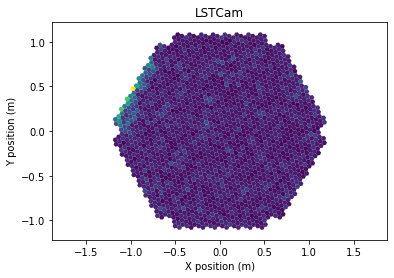

In [37]:
CameraDisplay(tel.camera, image=dl1tel.image)

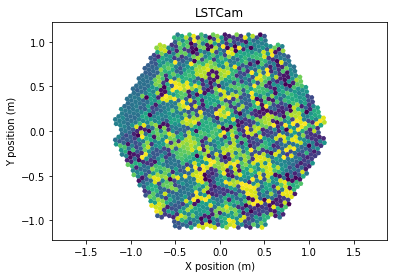

In [38]:
CameraDisplay(tel.camera, image=dl1tel.pulse_time)

Now for Hillas Parameters

In [39]:
from ctapipe.image import hillas_parameters, tailcuts_clean

In [40]:
image = dl1tel.image
mask = tailcuts_clean(tel.camera, image, picture_thresh=10, boundary_thresh=5)
mask

array([False, False, False, ..., False, False, False])

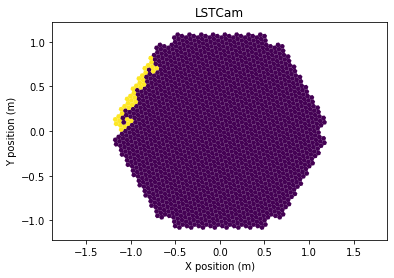

In [41]:
CameraDisplay(tel.camera, image=mask)

In [42]:
cleaned = image.copy()
cleaned[~mask] = 0 

(0, 1.0)

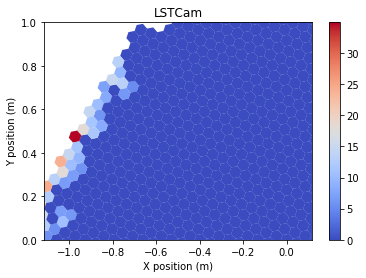

In [43]:
disp = CameraDisplay(tel.camera, image=cleaned)
disp.cmap = plt.cm.coolwarm
disp.add_colorbar()
plt.xlim(-1.0,0)
plt.ylim(0,1.0)

In [44]:
params = hillas_parameters(tel.camera, cleaned)
print(params)

{'intensity': 450.5841774121861,
 'kurtosis': 1.9734831010417027,
 'length': <Quantity 0.2454293 m>,
 'phi': <Angle 2.75740724 rad>,
 'psi': <Angle 1.08619502 rad>,
 'r': <Quantity 1.052376 m>,
 'skewness': 0.24604061670966093,
 'width': <Quantity 0.03954244 m>,
 'x': <Quantity -0.97566205 m>,
 'y': <Quantity 0.39443479 m>}


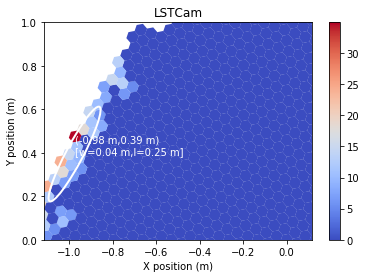

In [45]:
disp = CameraDisplay(tel.camera, image=cleaned)
disp.cmap = plt.cm.coolwarm
disp.add_colorbar()
plt.xlim(-1.0,0)
plt.ylim(0,1.0)
disp.overlay_moments(params, color='white', lw=2)

## Part 4:  Let's put it all together: 
- loop over events, selecting only telescopes of the same type (e.g. LST:LSTCam)
- for each event, apply calibration/trace integration
- calculate Hillas parameters 
- write out all hillas paremeters to a file that can be loaded with Pandas

first let's select only those telescopes with LST:LSTCam

In [46]:
subarray.telescope_types

[TelescopeDescription(type=LST, name=LST, optics=LST, camera=LSTCam),
 TelescopeDescription(type=MST, name=MST, optics=MST, camera=FlashCam),
 TelescopeDescription(type=SST, name=ASTRI, optics=ASTRI, camera=ASTRICam)]

In [47]:
subarray.get_tel_ids_for_type("LST_LST_LSTCam")

[1, 2, 3, 4]

Now let's write out program

In [48]:
data = utils.get_dataset_path("gamma_test_large.simtel.gz") 
source = event_source(data, allowed_tels=[1,2,3,4],  max_events=10) # remove the max_events limit to get more stats

In [49]:
for event in source:
    calib(event)
    
    for tel_id, tel_data in event.dl1.tel.items():
        tel = event.inst.subarray.tel[tel_id]
        mask = tailcuts_clean(tel.camera, tel_data.image)
        params = hillas_parameters(tel.camera[mask], tel_data.image[mask])

In [50]:
from ctapipe.io import HDF5TableWriter


In [51]:
with HDF5TableWriter(filename='hillas.h5', group_name='dl1', overwrite=True) as writer:
    
    for event in event_source(data, allowed_tels=[1,2,3,4],  max_events=10):
        calib(event)
    
        for tel_id, tel_data in event.dl1.tel.items():
            tel = event.inst.subarray.tel[tel_id]
            mask = tailcuts_clean(tel.camera, tel_data.image)
            params = hillas_parameters(tel.camera[mask], tel_data.image[mask])
            writer.write("hillas", params)

### We can now load in the file we created and plot it

In [52]:
!ls *.h5

hillas.h5


In [53]:
import pandas as pd

hillas = pd.read_hdf("hillas.h5", key='/dl1/hillas')
hillas

,intensity,kurtosis,length,phi,psi,r,skewness,width,x,y
0,487.476214,2.002041,0.242312,158.408735,63.145178,1.045657,0.321630,0.046845,-0.972286,0.384784
1,24235.389945,6.299195,0.214123,128.402429,-75.990548,0.923533,1.663777,0.083103,-0.573681,0.723743
2,81.252290,2.797550,0.045043,51.621855,63.564682,0.908372,0.463036,0.015390,0.563962,0.712100
3,101.234466,2.098711,0.051080,69.173821,81.540893,0.958725,0.206285,0.020644,0.340860,0.896085
4,76.273207,2.766870,0.044145,118.223829,73.286384,0.966727,-0.310947,0.020285,-0.457182,0.851789
5,30.754363,2.277771,0.033088,133.821326,-19.104678,0.951455,-0.060794,0.000001,-0.658798,0.686477
6,148.823297,5.088021,0.107545,165.353912,40.042441,1.044461,1.325198,0.035770,-1.010522,0.264090
7,263.484925,2.732760,0.061533,-178.204001,-13.703852,1.008144,0.437843,0.047032,-1.007649,-0.031596
8,92.449732,5.054535,0.413698,167.541102,15.975587,0.672037,1.970612,0.029936,-0.656211,0.144985
9,108.459053,2.236591,0.100173,170.811524,48.966843,1.123619,0.802975,0.019330,-1.109201,0.179422


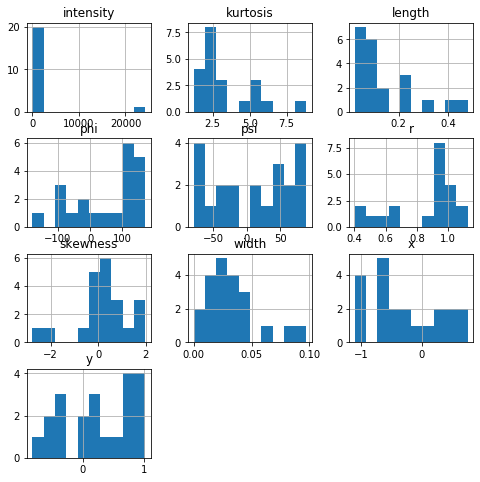

In [54]:
_ = hillas.hist(figsize=(8,8))

If you do this yourself, loop over more events to get better statistics